In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline
from tensorflow import keras


In [3]:
tf.config.experimental.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
tf.test.is_built_with_cuda()


False

In [5]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
#I will only be using CPUs capabilities for the classification of the images getting downloaded from cs.toronto and we will be using :
# We are using 60000 small images for classification. These images can be  classified in one of the 10 categories below,
# classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# We will use simple artificial neural network (we are not using CNN, usually CNN is preferred for image classification , with simple ANN that still gives pretty high accuracy).
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

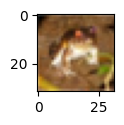

In [9]:
#as we know y_train contains all the results of x_test. Now for proper visualization we will be defining a new function for plotting new graphs and then visualizing them to have a conclusive result
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])
plot_sample(0)

In [10]:
#the above image is of a frog and as we know in y_test:
y_train[0]

array([6], dtype=uint8)

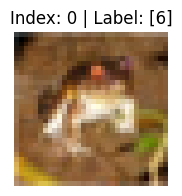

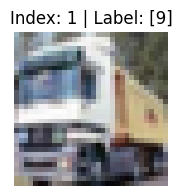

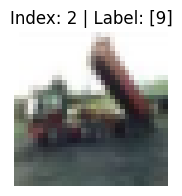

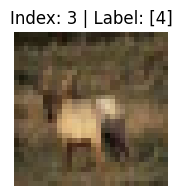

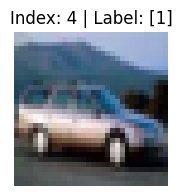

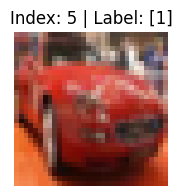

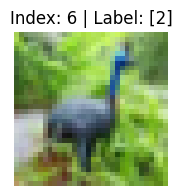

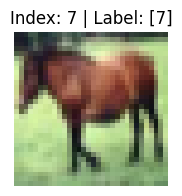

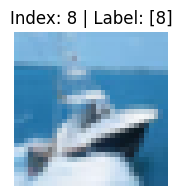

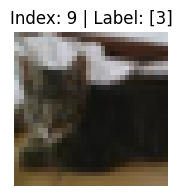

In [11]:
#hence we successfully visually verified the frog image as y_train =6 and 6 is the no. denoted to the class FROG
def full_range_plot(index):
    for i in range(index):
        plt.figure(figsize=(2,2))
        plt.imshow(X_train[i])
        plt.title(f"Index: {i} | Label: {y_train[i]}")
        plt.axis('off')
full_range_plot(10)

In [12]:
#now i made it into an array of classes including all index wise image classification
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

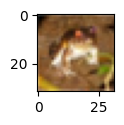

In [13]:
plot_sample(0)

In [14]:
classes[y_train[0][0]]

'frog'

In [15]:
#Now scaling the images for better classification score, Since we do have at most 255 pixel count hence we can divide the samples to have scaled versions for each
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [16]:
#There we go for categorical encoding
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], shape=(10000, 10))

In [18]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [19]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(50000, 10))

In [20]:
#Now we will be creating an ANN: Artificial Neural Network using keras sequential model
model=keras.Sequential([
    #since we do have this data into a matrix and we need this into a flattened 1D array hence to do it we will use keras flattening APIs
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    #For the output layer of 10 final classification outputs
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train_categorical,epochs=25)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.2968 - loss: 0.3041
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.3617 - loss: 0.2819
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.3784 - loss: 0.2738
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3956 - loss: 0.2681
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4047 - loss: 0.2636
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4157 - loss: 0.2597
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4233 - loss: 0.2564
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4315 - loss: 0.2533
Epoch 9/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4361 - loss: 0.2506
Epoch 10/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.4441 - loss: 0.2482
Epoch 11/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4498 - loss: 0.2459
Epoch 12

In [23]:
import numpy as np
np.argmax(model.predict(X_test_scaled)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


np.int64(3)

In [28]:
classes[y_test[0][0]]

'cat'

In [29]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


'cat'

In [31]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4825 - loss: 0.2299


[0.22988715767860413, 0.48249998688697815]

In [32]:
def get_model():
    model = keras.Sequential([
    keras. layers. Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras. layers.Dense(1000, activation='relu'),
        keras. layers.Dense(10, activation='sigmoid')
    ])
    model.compile(optimizer='SGD',
        loss= 'categorical_crossentropy',
        metrics=['accuracy'])
    return model

In [35]:
#Now we will be running the classification using cpu internals
import time
import tensorflow as tf

start = time.time()  # start timer

with tf.device("/CPU:0"):
    cpu_model = get_model()
    cpu_model.fit(
        X_train_scaled,
        y_train_categorical,
        epochs=2,
        batch_size=64,
        verbose=1
    )

end = time.time()  # end timer
print(f"\n🕒 Total training time on CPU: {end - start:.2f} seconds")

with tf.device("/CPU:0"):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical,epochs=2)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.3381 - loss: 1.8625
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.4068 - loss: 1.6840

🕒 Total training time on CPU: 29.06 seconds
Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.3537 - loss: 1.8092
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4323 - loss: 1.6192
